<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/2020_BiharElections/IndividualParties/BJP5Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 201, done.
remote: Counting objects: 100% (201/201), done.
remote: Compressing objects: 100% (176/176), done.
remote: Total 201 (delta 67), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (201/201), 16.71 MiB | 8.37 MiB/s, done.
Resolving deltas: 100% (67/67), done.


# **Data Fetch**

In [ ]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler

consumer_key= "DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret  = "jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"
access_token ="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret= "cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
# authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-08-01"
date2 = "2020-11-09"


text = []


def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2).items():
        print(tweet.text)
        text.append(tweet.text)
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"#modi")  
           
data1 = list(zip(text))
df = pd.DataFrame(data =data1, columns =["Tweet"])

df.to_csv('bjp4.csv') 

Streaming output truncated to the last 5000 lines.
RT @drshamamohd: A letter signed by Dy Defence Advisor to CDS General Bipin Rawat, proposes a pension cut &amp; increase in retirement age in t…
<--------------------------------------------------->
6359
What he really wants to show to the nation. #ArnabGoswami #ArnabGoswamiArrested #feku #Modi https://t.co/TwceU1Y1D8
<--------------------------------------------------->
6360
@jp_koning 2017 sep-oct PM #modi sudden #demonetisation vs #blackmoney aka unreported non #taxes paid… https://t.co/XofSoJPzp3
<--------------------------------------------------->
6361
Happy karwa chod to Hindus especially Indians

#KarwaChauth #abhinandan #ArnabGoswami #arnab #6yearsofcarryminati… https://t.co/J7uV4s4itt
<--------------------------------------------------->
6362
RT @Omfulse: 👉💸 Today's positions 💯👈
Profit :- 22k (ROI: 1.89%)

#nifty #nse #bse #banknifty #options #optionstrading #upstox #zerodha #zer…
<--------------------------------------------

# **Importing Libraries**

In [ ]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# **Cleaning BJP Dataset 4**



> **Tweet count**



In [ ]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

7659



> **Removing Duplicates Tweets, if any.**



In [ ]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)

3244

In [ ]:
df['Tweet'].duplicated().sum()

4415



```
Number of duplicate tweets
```



In [ ]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(3244, 1)



```
Removed all the duplicate tweets
```



In [ ]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)



```
From now on, all the preprocessing & modelling on tweets will be stored in the data column called 'Processed_Tweet' 
```



In [ ]:
count = 0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

635

In [ ]:
df.shape

(2609, 2)

In [ ]:
df['Processed_Tweet']

2       @venzq @Swamy39 @GeneralBakshi God only knows ...
3       #ISI #RAW Border transcending #Democrats #Modi...
10      After Trump, #Bibi or #Modi!  Or they still ha...
11      Joy in India as Biden and Harris Win, but Ques...
12      BJP leader urges PM #Modi to confer #Bharat #R...
                              ...                        
3237    @RanjitOne @BN34772728 @rkmarar9 @mangellife29...
3238    @bharat_builder yaa Indians who have taken up ...
3239    Story from imgs#Modi stands with #vienna, #fra...
3240    Accept the reality  you can't close your eyes ...
3242    Supporting #BJP is #Modi Bhakti as per #NDTV b...
Name: Processed_Tweet, Length: 2609, dtype: object



> **Removing Usernames**



In [ ]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

2             God only knows what #Modi #Amit #PMO are...
3       #ISI #RAW Border transcending #Democrats #Modi...
10      After Trump, #Bibi or #Modi!  Or they still ha...
11      Joy in India as Biden and Harris Win, but Ques...
12      BJP leader urges PM #Modi to confer #Bharat #R...
                              ...                        
3237                              https://t.co/SpjTrtMVn2
3238      yaa Indians who have taken up US Citizenship...
3239    Story from imgs#Modi stands with #vienna, #fra...
3240    Accept the reality  you can't close your eyes ...
3242    Supporting #BJP is #Modi Bhakti as per #NDTV b...
Name: Processed_Tweet, Length: 2609, dtype: object



> **Removing URL,if any**



In [ ]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

2             God only knows what #Modi #Amit #PMO are...
3       #ISI #RAW Border transcending #Democrats #Modi...
10      After Trump, #Bibi or #Modi!  Or they still ha...
11      Joy in India as Biden and Harris Win, but Ques...
12      BJP leader urges PM #Modi to confer #Bharat #R...
                              ...                        
3237                              https://t.co/SpjTrtMVn2
3238      yaa Indians who have taken up US Citizenship...
3239    Story from imgs#Modi stands with #vienna, #fra...
3240    Accept the reality  you can't close your eyes ...
3242    Supporting #BJP is #Modi Bhakti as per #NDTV b...
Name: Processed_Tweet, Length: 2609, dtype: object



> **Removing Hashtags, but keeping the word**



In [ ]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

2             God only knows what Modi Amit PMO are do...
3       ISI RAW Border transcending Democrats Modi Sha...
10      After Trump, Bibi or Modi!  Or they still have...
11      Joy in India as Biden and Harris Win, but Ques...
12      BJP leader urges PM Modi to confer Bharat Ratn...
                              ...                        
3237                              https://t.co/SpjTrtMVn2
3238      yaa Indians who have taken up US Citizenship...
3239    Story from imgsModi stands with vienna, france...
3240    Accept the reality  you can't close your eyes ...
3242    Supporting BJP is Modi Bhakti as per NDTV but ...
Name: Processed_Tweet, Length: 2609, dtype: object



> **Removing preprocessor library**



In [ ]:
!pip install tweet-preprocessor
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

2       God only knows what Modi Amit PMO are doing, e...
3       ISI RAW Border transcending Democrats Modi Sha...
10      After Trump, Bibi or Modi! Or they still have ...
11      Joy in India as Biden and Harris Win, but Ques...
12      BJP leader urges PM Modi to confer Bharat Ratn...
                              ...                        
3237                                                     
3238    yaa Indians who have taken up US Citizenship a...
3239    Story from imgsModi stands with vienna, france...
3240    Accept the reality you can't close your eyes i...
3242    Supporting BJP is Modi Bhakti as per NDTV but ...
Name: Processed_Tweet, Length: 2609, dtype: object

> **Removing any special characters, numbers, punctuation, etc** 

In [ ]:
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

2       God only knows what Modi Amit PMO are doing  e...
3       ISI RAW Border transcending Democrats Modi Sha...
10      After Trump  Bibi or Modi  Or they still have ...
11      Joy in India as Biden and Harris Win  but Ques...
12      BJP leader urges PM Modi to confer Bharat Ratn...
                              ...                        
3237                                                     
3238    yaa Indians who have taken up US Citizenship a...
3239    Story from imgsModi stands with vienna  france...
3240    Accept the reality you can t close your eyes i...
3242    Supporting BJP is Modi Bhakti as per NDTV but ...
Name: Processed_Tweet, Length: 2609, dtype: object



> **Converting to Lowercase**



In [ ]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

2       god only knows what modi amit pmo are doing  e...
3       isi raw border transcending democrats modi sha...
10      after trump  bibi or modi  or they still have ...
11      joy in india as biden and harris win  but ques...
12      bjp leader urges pm modi to confer bharat ratn...
                              ...                        
3237                                                     
3238    yaa indians who have taken up us citizenship a...
3239    story from imgsmodi stands with vienna  france...
3240    accept the reality you can t close your eyes i...
3242    supporting bjp is modi bhakti as per ndtv but ...
Name: Processed_Tweet, Length: 2609, dtype: object



```
We still have to remove stopwords, perform lemmatization & do stemming. So let us proceed with that
```



In [ ]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()



> **Removing Stopwords**



In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['then', 'once', "needn't", 'to', 're', 'him', 'i', "weren't", 'the', 's', 'what', 'is', 'because', 'doing', 'will', 'couldn', 'but', 'm', 'some', "aren't", "you'd", 'out', 'our', 'of', 'she', 'yourselves', 'or', 'for', 'd', 'was', "won't", 'who', "you're", 'in', 'am', 'being', "it's", 'more', 'having', 'down', 'they', 'and', "couldn't", 'there', "you'll", 'hadn', 'where', "wasn't", 'were', 'now', 'be', 'haven', 'above', 'off', "mustn't", 'whom', 'both', 'mightn', 'them', 'under', 'needn', 'herself', 'after', 'only', 'didn', 'been', 't', 'while', 'no', 'over', "wouldn't", 'an', 'most', 'nor', 'each', 'their', 'about', 'again', 'few', 'itself', 'do', 'up', 'between', "hasn't", 'ma', 'aren', 'your', 'my', 'any', 'he', 'has', 'which', 'when', 'weren', 'during', 'through', 'mustn', 'll', 'himself', 'not', 'doesn', 'such', 'you', "shan't", 'ourselves', 'should', "should've", 'into', 'o', 'below', 'yourself', 'too', 'yours', 'with', 'we', 'if', 'just', "don't", 'y', "mightn't", 'his', 'that'

In [ ]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

2       god knows modi amit pmo everyone saw happened ...
3       isi raw border transcending democrats modi sha...
10      trump bibi modi still agendas follow nationali...
11      joy india biden harris win questions worldpoli...
12      bjp leader urges pm modi confer bharat ratna l...
                              ...                        
3237                                                     
3238    yaa indians taken us citizenship voting biden ...
3239    story imgsmodi stands vienna france sometimes ...
3240    accept reality close eyes facts amp unsc resol...
3242    supporting bjp modi bhakti per ndtv congress c...
Name: Processed_Tweet, Length: 2609, dtype: object



> **Tokenizing**



In [ ]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

2       [god, knows, modi, amit, pmo, everyone, saw, h...
3       [isi, raw, border, transcending, democrats, mo...
10      [trump, bibi, modi, still, agendas, follow, na...
11      [joy, india, biden, harris, win, questions, wo...
12      [bjp, leader, urges, pm, modi, confer, bharat,...
                              ...                        
3237                                                   []
3238    [yaa, indians, taken, us, citizenship, voting,...
3239    [story, imgsmodi, stands, vienna, france, some...
3240    [accept, reality, close, eyes, facts, amp, uns...
3242    [supporting, bjp, modi, bhakti, per, ndtv, con...
Name: Processed_Tweet, Length: 2609, dtype: object



> **Stemming**



In [ ]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

2       [god, know, modi, amit, pmo, everyon, saw, hap...
3       [isi, raw, border, transcend, democrat, modi, ...
10      [trump, bibi, modi, still, agenda, follow, nat...
11      [joy, india, biden, harri, win, question, worl...
12      [bjp, leader, urg, pm, modi, confer, bharat, r...
                              ...                        
3237                                                   []
3238    [yaa, indian, taken, us, citizenship, vote, bi...
3239    [stori, imgsmodi, stand, vienna, franc, someti...
3240    [accept, realiti, close, eye, fact, amp, unsc,...
3242    [support, bjp, modi, bhakti, per, ndtv, congre...
Name: Processed_Tweet, Length: 2609, dtype: object

In [ ]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Tweet,Processed_Tweet
2,@venzq @Swamy39 @GeneralBakshi God only knows ...,"[god, know, modi, amit, pmo, everyon, saw, hap..."
3,#ISI #RAW Border transcending #Democrats #Modi...,"[isi, raw, border, transcend, democrat, modi, ..."
10,"After Trump, #Bibi or #Modi! Or they still ha...","[trump, bibi, modi, still, agenda, follow, nat..."
11,"Joy in India as Biden and Harris Win, but Ques...","[joy, india, biden, harri, win, question, worl..."
12,BJP leader urges PM #Modi to confer #Bharat #R...,"[bjp, leader, urg, modi, confer, bharat, ratna..."
...,...,...
3237,@RanjitOne @BN34772728 @rkmarar9 @mangellife29...,[]
3238,@bharat_builder yaa Indians who have taken up ...,"[yaa, indian, taken, citizenship, vote, biden,..."
3239,"Story from imgs👇🏿#Modi stands with #vienna, #f...","[stori, imgsmodi, stand, vienna, franc, someti..."
3240,Accept the reality you can't close your eyes ...,"[accept, realiti, close, eye, fact, amp, unsc,..."


In [ ]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

23018

In [ ]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))

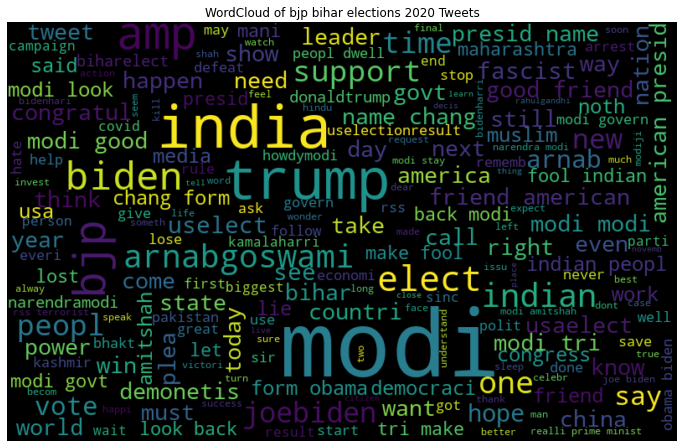

In [ ]:
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of bjp bihar elections 2020 Tweets")
plt.show()

# **Sentiment Analysis**

In [ ]:
from textblob import TextBlob

In [ ]:
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

2609

In [ ]:
df['Processed_Tweet']

2       [god, know, modi, amit, pmo, everyon, saw, hap...
3       [isi, raw, border, transcend, democrat, modi, ...
10      [trump, bibi, modi, still, agenda, follow, nat...
11      [joy, india, biden, harri, win, question, worl...
12      [bjp, leader, urg, modi, confer, bharat, ratna...
                              ...                        
3237                                                   []
3238    [yaa, indian, taken, citizenship, vote, biden,...
3239    [stori, imgsmodi, stand, vienna, franc, someti...
3240    [accept, realiti, close, eye, fact, amp, unsc,...
3242    [support, bjp, modi, bhakti, per, ndtv, congre...
Name: Processed_Tweet, Length: 2609, dtype: object

In [ ]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 705
Negative Tweets: 331
Neutral Tweets 1573




```
Classifying Tweets As Positive,Negetive and Neutral
```



In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,Negative,Neutral,Positive,Compound
0,0.000,0.826,0.174,0.2732
1,0.000,1.000,0.000,0.0000
2,0.000,1.000,0.000,0.0000
3,0.000,0.441,0.559,0.8225
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
2604,0.000,0.000,0.000,0.0000
2605,0.000,1.000,0.000,0.0000
2606,0.174,0.826,0.000,-0.2732
2607,0.000,0.479,0.521,0.8689


In [ ]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.0,0.826,0.174,0.2732,Positive
1,0.0,1.000,0.000,0.0000,Neutral
2,0.0,1.000,0.000,0.0000,Neutral
3,0.0,0.441,0.559,0.8225,Positive
4,0.0,1.000,0.000,0.0000,Neutral


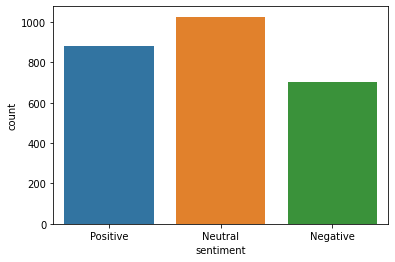

In [ ]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)